In [41]:
import numpy as np
from pandas import DataFrame,Series
import pandas as pd
people = DataFrame(np.random.randn(5,5),
                  columns= ['a', 'b', 'c', 'd', 'e'],
                  index=['Joe','Steve','Wes','Jim','Travis'])

In [42]:
people.ix[2:3,['b','c']] = np.nan

In [43]:
people

,a,b,c,d,e
Joe,0.803784,0.049702,-0.206672,-0.630903,-1.257592
Steve,-0.757795,-0.293595,0.979305,1.619864,-0.719921
Wes,0.453408,NaN,NaN,2.691223,0.017689
Jim,-1.087323,-1.594305,0.534590,-2.586649,-0.236209
Travis,-0.220119,1.033666,-0.207484,-0.440935,0.804520


In [44]:
key = ['one','two','one','two','one']

In [45]:
people.groupby(key)

In [46]:
def demean(arr):
    return arr - arr.mean()

In [47]:
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,0.458093,-0.491982,0.000406,-1.170698,-1.112464
Steve,0.164764,0.650355,0.222358,2.103257,-0.241856
Wes,0.107717,NaN,NaN,2.151428,0.162817
Jim,-0.164764,-0.650355,-0.222358,-2.103257,0.241856
Travis,-0.565810,0.491982,-0.000406,-0.980730,0.949648


In [48]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,3.700743e-17,0.000000e+00,0.000000e+00,-7.401487e-17,-3.700743e-17
two,-5.551115e-17,-5.551115e-17,-5.551115e-17,0.000000e+00,1.387779e-17


In [49]:
np.random.randn(10).shape

(10,)

In [50]:
frame = DataFrame({'data1': np.random.randn(1000),
                 'data2':np.random.randn(1000)})
factor = pd.cut(frame.data1,4)

In [51]:
grouped = frame.data2.groupby(factor)

In [52]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [53]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.0965, -1.248]",87.0,3.105483,0.131260,-1.984361
"(-1.248, 0.592]",651.0,2.903960,0.043067,-2.945757
"(0.592, 2.433]",254.0,2.830690,-0.087478,-2.935232
"(2.433, 4.274]",8.0,1.458528,-0.092864,-1.215707


In [54]:
grouped.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
"(-3.0965, -1.248]",87.0,0.131260,1.135720,-1.984361,-0.758745,0.090265,0.789062,3.105483
"(-1.248, 0.592]",651.0,0.043067,0.995496,-2.945757,-0.645235,0.025799,0.701319,2.903960
"(0.592, 2.433]",254.0,-0.087478,0.898838,-2.935232,-0.730796,-0.131050,0.525864,2.830690
"(2.433, 4.274]",8.0,-0.092864,0.823781,-1.215707,-0.376179,-0.008754,0.093634,1.458528


### 2012联邦委员会数据

In [55]:
fec = pd.read_csv('F:\数据挖掘\pydata-book\ch09\P00000001-ALL.csv')
fec.columns

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [56]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [57]:
top_city = fec['contbr_city'].value_counts()[:10]#[-5:]
top_city

NEW YORK         25858
CHICAGO          16355
WASHINGTON       13902
HOUSTON          12375
LOS ANGELES      11137
AUSTIN            8514
SAN FRANCISCO     8513
SEATTLE           8095
ATLANTA           7248
DALLAS            7221
Name: contbr_city, dtype: int64

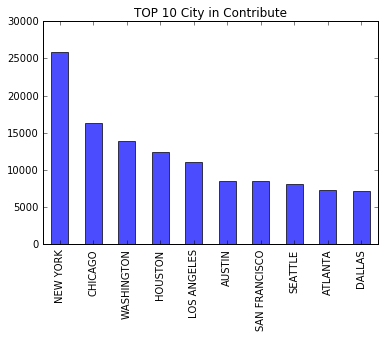

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
top_city.plot(title='TOP 10 City in Contribute',kind='bar',alpha=0.7)

### 将DataFrame不重复列转换为一个字典

In [59]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [60]:
unique_cands.shape

(13,)

In [61]:
candi_parties = ['Republican','Democrat']
'''
for x in unique_cands:
    if x != 'Obama, Barack':
        parties[x] = candi_parties[0]
    else:
        parties[x] = candi_parties[1]
'''
apart = np.where( unique_cands!= unique_cands[2],candi_parties[0],candi_parties[1])
parties = dict(zip(unique_cands,apart))

In [62]:
parties

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [63]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [64]:
# 将其添加一个新列
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [65]:
fec = fec[fec['contb_receipt_amt']>0]

In [66]:
fec_mrbo = fec[fec.cand_nm.isin([unique_cands[1],unique_cands[2]])]

In [67]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [68]:
occ_mapping = {'INFORMATION REQUEST PRE BEST EFFORTS':'NOT PROVIDED',
              'INFORMATION REQUEST':'NOT PROVIDED',
              'INFORMATION REQUEST(BEST EFFORTS)' :'NOT PROVIDED'}

# 没有映射关系 返回x
f = lambda x : occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [69]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')

In [70]:
over2mm = by_occupation[by_occupation.sum(1)>2000000]

In [71]:
over2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INFORMATION REQUESTED,4866973.96,3.896616e+06
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.634053e+07


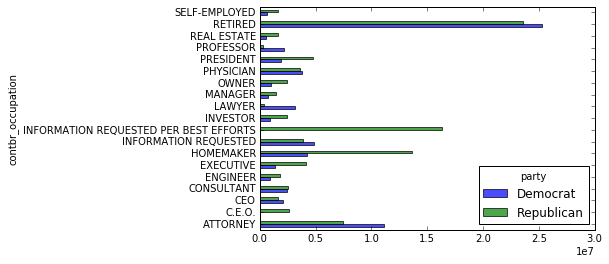

In [72]:
over2mm.plot(kind='barh',alpha=0.7)

### 对Obama和Romney出资金额高的职业或企业

In [130]:
def get_amounts(group, key, n =5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending =False)[n:]

In [131]:
fec_mrbo.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [132]:
# 根据职业进行聚合

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation',n=7)

cand_nm        contbr_occupation                     
Obama, Barack  PROFESSOR                                 2165071.08
               CEO                                       2073284.79
               PRESIDENT                                 1878509.95
               NOT EMPLOYED                              1709188.20
               EXECUTIVE                                 1355161.05
               TEACHER                                   1250969.15
               WRITER                                    1084188.88
               OWNER                                     1001567.36
               ENGINEER                                   951525.55
               INVESTOR                                   884133.00
               ARTIST                                     763125.00
               MANAGER                                    762883.22
               SELF-EMPLOYED                              672393.40
               STUDENT                                    6280

In [90]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                
Obama, Barack  SIDLEY AUSTIN LLP                  168254.00
               REFUSED                            149516.07
               DLA PIPER                          148235.00
               HARVARD UNIVERSITY                 131368.94
               IBM                                128490.93
               GOOGLE                             125302.88
               MICROSOFT CORPORATION              108849.00
               KAISER PERMANENTE                  104949.95
               JONES DAY                          103712.50
               STANFORD UNIVERSITY                101630.75
               COLUMBIA UNIVERSITY                 96325.12
               UNIVERSITY OF CHICAGO               88575.00
               AT&T                                88132.12
               US GOVERNMENT                       87689.00
               MORGAN & MORGAN                     87250.00
               VERIZON                             85

In [101]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [102]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [103]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [133]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [134]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [136]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [137]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [138]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


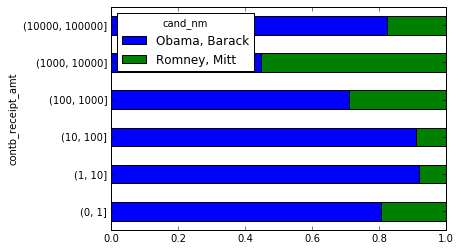

In [140]:
normed_sums[:-2].plot(kind='barh',stacked=True)